# LGBM & XGBM

### Objective:

#### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

### Exploratory Data Analysis (EDA):

#### 1.	Load the Titanic dataset using Python's pandas library.

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and handling arrays
import numpy as np

# Import the matplotlib.pyplot module for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for statistical data visualization and enhanced plotting
import seaborn as sns

In [2]:
# Read the Titanic training dataset from a CSV file into a DataFrame
titanic_train = pd.read_csv("Titanic_train.csv")

# Display the contents of the DataFrame to inspect the data
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Display summary information about the DataFrame, including the number of non-null entries and data types of each column
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Convert the data types of specified columns to 'category' for efficient memory usage and analysis
titanic_train = titanic_train.astype({
    "PassengerId": "category",  # Convert PassengerId to category type
    "Survived": "category",     # Convert Survived to category type
    "Pclass": "category",       # Convert Pclass to category type
    "Name": "category",         # Convert Name to category type
    "Ticket": "category",       # Convert Ticket to category type
    "Cabin": "category",        # Convert Cabin to category type
    "Sex": "category",          # Convert Sex to category type
    "Embarked": "category"      # Convert Embarked to category type
})

# Display the data types of each column in the DataFrame to verify the changes
titanic_train.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [5]:
# Generate and display descriptive statistics for numerical columns in the DataFrame
titanic_train.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [6]:
# List of categorical columns in the DataFrame
cat_cols = ['Pclass', 'Sex', 'Embarked']

# List of numerical columns in the DataFrame
num_cols = ['Age', 'SibSp', 'Parch']

### 2.	Check for missing values.

In [7]:
# Calculate and display the number of missing (null) values in each column of the DataFrame
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3.	Explore data distributions using histograms and box plots.

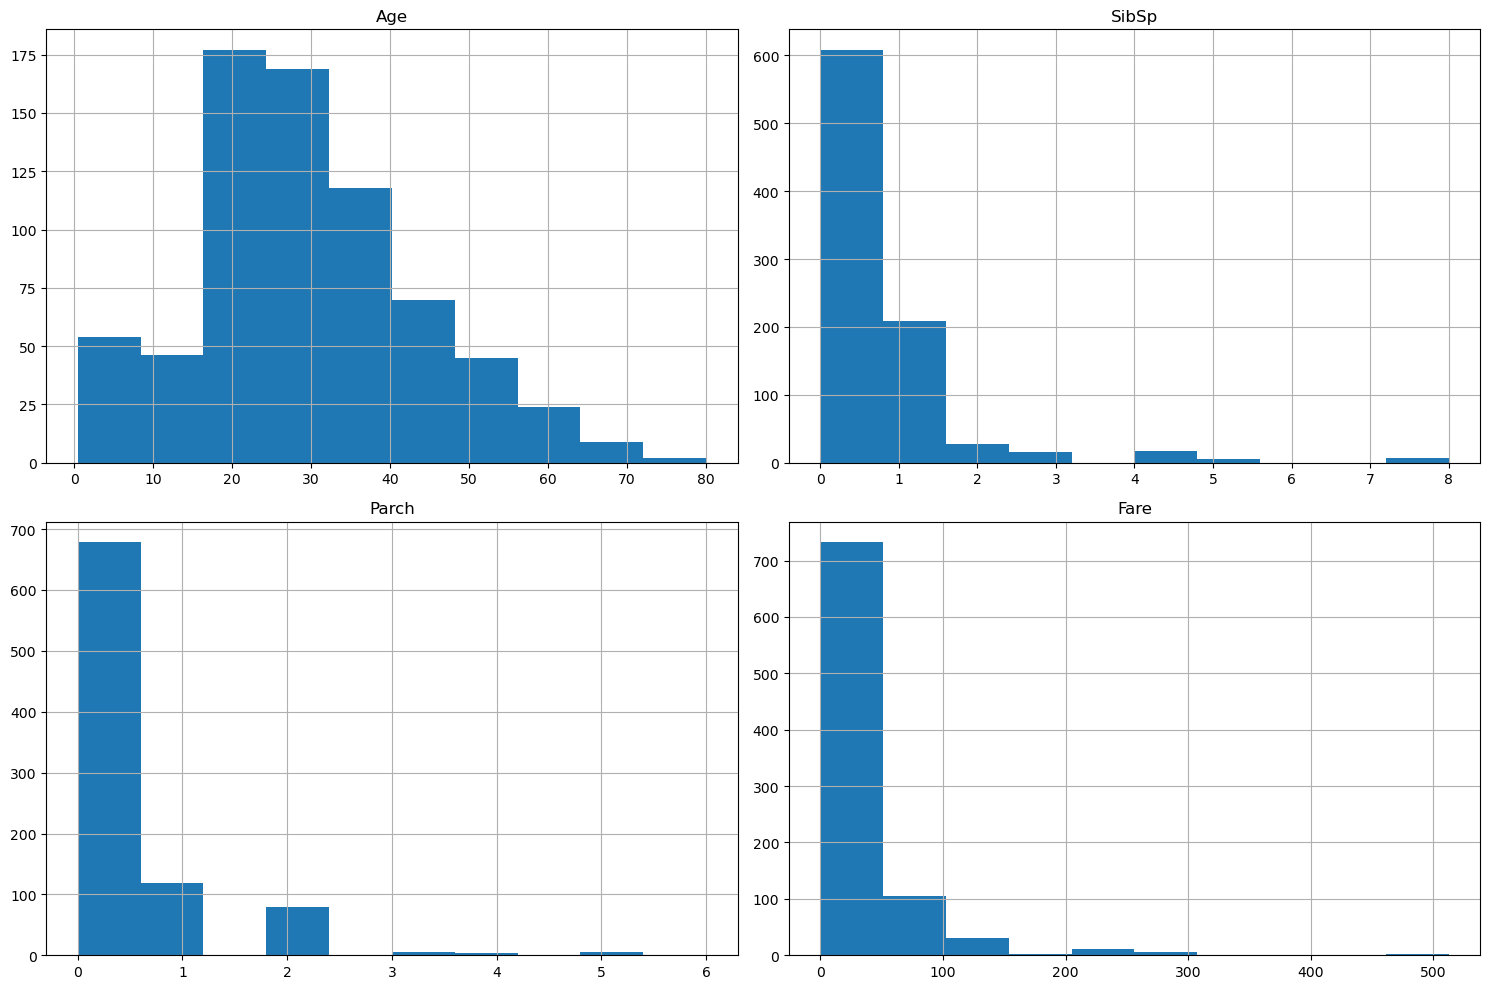

In [8]:
# Plot histograms for all numerical columns in the DataFrame with a specified figure size
titanic_train.hist(figsize=(15, 10))

# Adjust the layout of the plots to fit into the figure area without overlapping
plt.tight_layout()

# Display the histograms
plt.show()

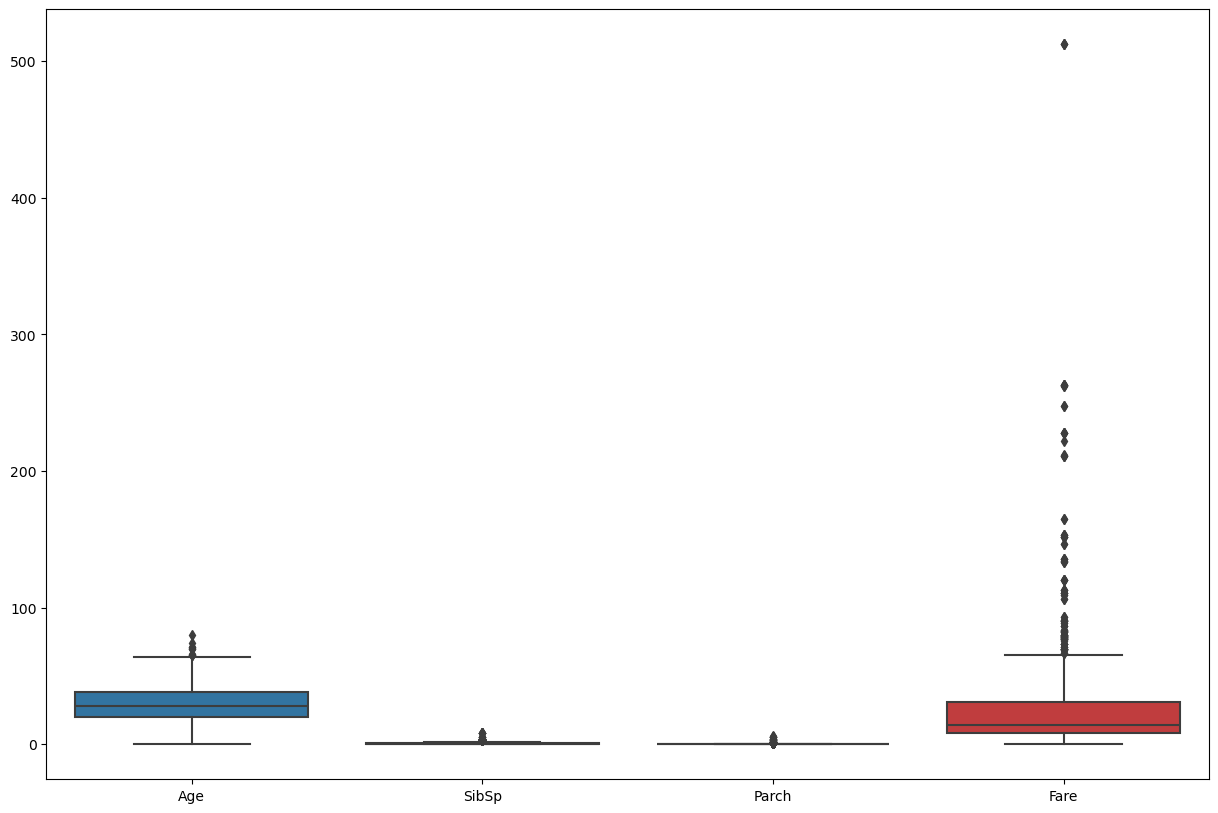

In [9]:
# Create a new figure for the boxplot with a specified figure size
plt.figure(figsize=(15, 10))

# Plot boxplots for each numerical column in the DataFrame using Seaborn
sns.boxplot(data=titanic_train)

# Display the boxplots
plt.show()

### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

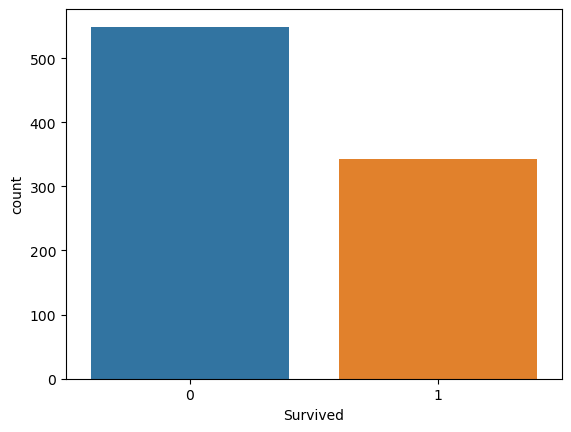

In [10]:
# Import the warnings module to handle any warnings during the plotting process
import warnings

# Ignore any warnings that may appear during the execution
warnings.filterwarnings("ignore")

# Plot a countplot to visualize the distribution of the 'Survived' target variable
sns.countplot(x='Survived', data=titanic_train)

# Display the plot
plt.show()

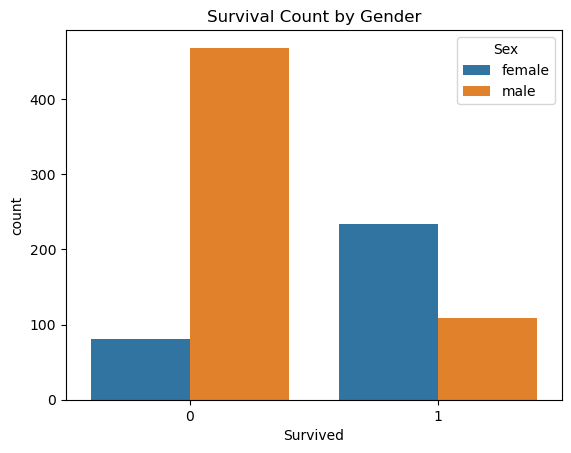

In [11]:
# Plot a countplot to visualize the distribution of the 'Survived' variable, with separate counts for each gender ('Sex')
sns.countplot(x='Survived', hue='Sex', data=titanic_train)

# Set a title for the plot
plt.title('Survival Count by Gender')

# Display the plot
plt.show()

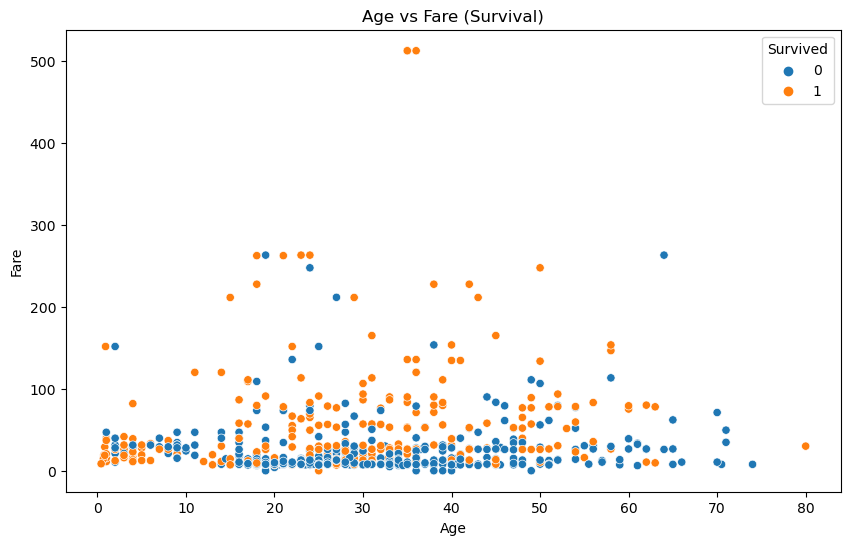

In [12]:
# Create a new figure for the scatter plot with a specified figure size
plt.figure(figsize=(10, 6))

# Plot a scatter plot of 'Age' vs. 'Fare', with points colored based on the 'Survived' variable
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_train)

# Set a title for the plot
plt.title('Age vs Fare (Survival)')

# Display the scatter plot
plt.show()

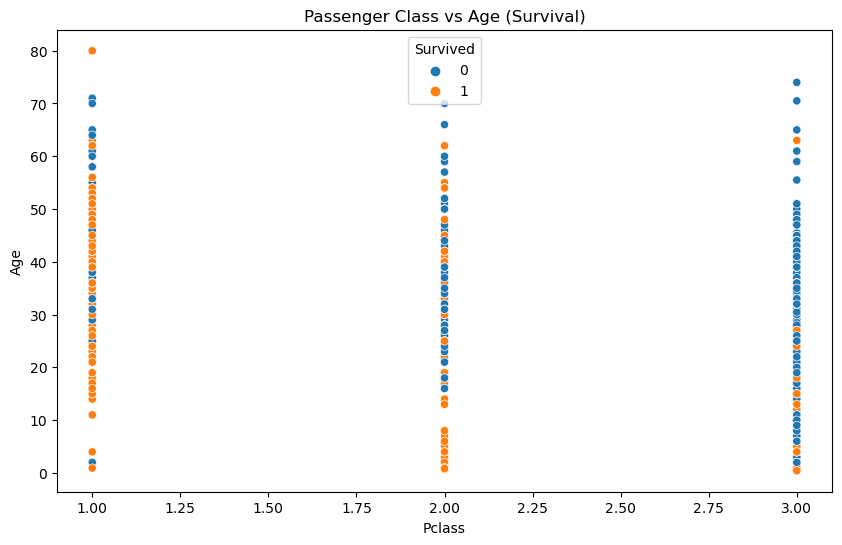

In [13]:
# Create a new figure for the scatter plot with a specified figure size
plt.figure(figsize=(10, 6))

# Plot a scatter plot of 'Pclass' vs. 'Age', with points colored based on the 'Survived' variable
sns.scatterplot(x='Pclass', y='Age', hue='Survived', data=titanic_train)

# Set a title for the plot
plt.title('Passenger Class vs Age (Survival)')

# Display the scatter plot
plt.show()

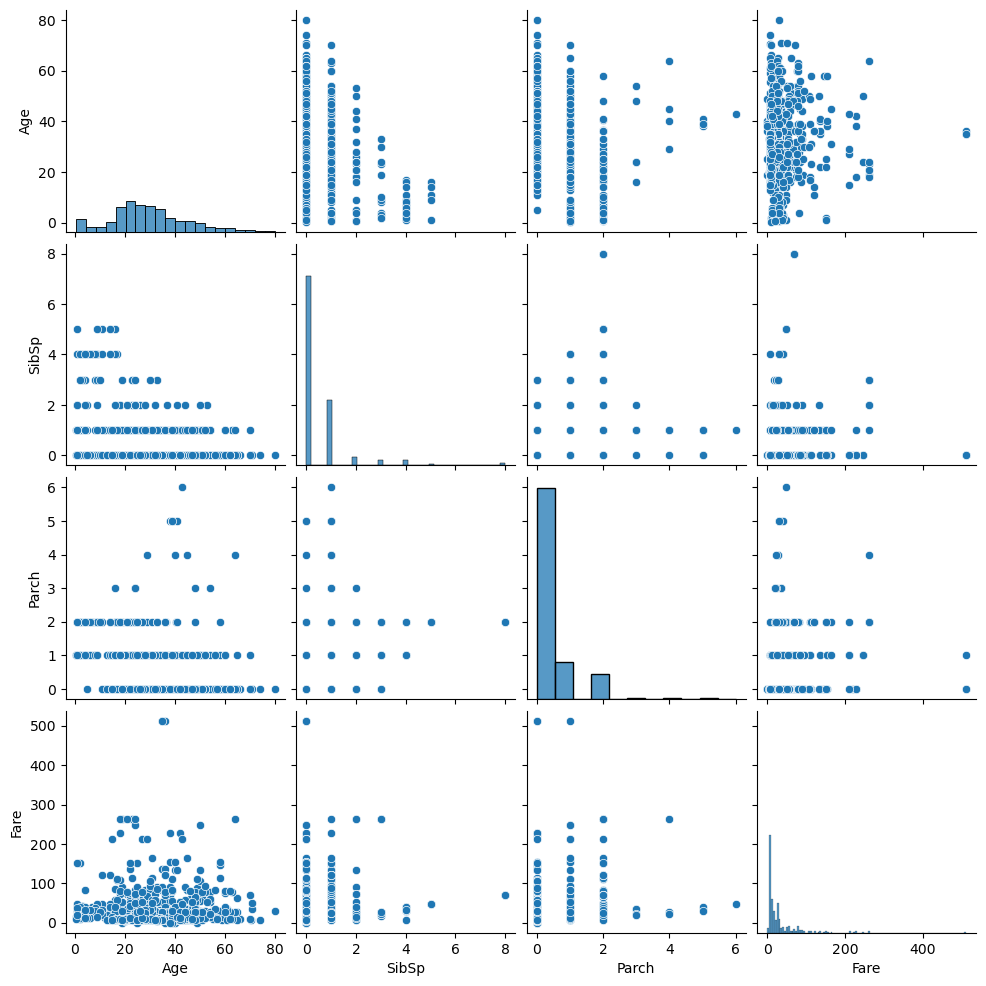

In [14]:
# Plot pairwise relationships in the dataset using Seaborn's pairplot, which shows scatter plots for numeric variables
sns.pairplot(titanic_train)

# Display the pairplot
plt.show()

### Data Preprocessing:

#### 1.	Impute missing values.

In [15]:
# Calculate and print the median of the 'Age' column
print(titanic_train["Age"].median())

# Calculate and print the mode of the 'Cabin' column (most frequent value)
print(titanic_train["Cabin"].mode())

# Calculate and print the mode of the 'Embarked' column (most frequent value)
print(titanic_train["Embarked"].mode())

28.0
0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: category
Categories (147, object): ['A10', 'A14', 'A16', 'A19', ..., 'F38', 'F4', 'G6', 'T']
0    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']


In [16]:
# Fill missing values in the 'Age' column with the value 28.0 (median or chosen value)
titanic_train["Age"] = titanic_train["Age"].fillna(28.0)

# Fill missing values in the 'Cabin' column with 'G6' (most frequent value or chosen category)
titanic_train["Cabin"] = titanic_train["Cabin"].fillna("G6")

# Fill missing values in the 'Embarked' column with 'S' (most frequent value or chosen category)
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")

In [17]:
# Calculate and display the number of missing (null) values in each column of the DataFrame after filling missing data
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
# Drop unnecessary columns ('Survived', 'PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name') from the DataFrame to create the feature matrix X
X = titanic_train.drop(["Survived", "PassengerId", "Ticket", "Cabin", "Fare", "Name"], axis=1)

# Assign the 'Survived' column as the target variable y
y = titanic_train["Survived"]

In [19]:
# Display the feature matrix X to inspect the remaining columns after dropping the specified ones
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,28.0,1,2,S
889,1,male,26.0,0,0,C


In [20]:
# Display the target variable y to inspect the values of the 'Survived' column
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

### 2.	Encode categorical variables using one-hot encoding or label encoding. 

In [21]:
# Import StandardScaler from scikit-learn for standardizing numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the feature matrix X
scaler = scaler.fit(X[num_cols])

# Transform the numerical columns using the fitted scaler and create a new DataFrame with standardized values
X_std = pd.DataFrame(scaler.transform(X[num_cols]), columns=X[num_cols].columns)

# Display the standardized feature matrix X_std
X_std

,Age,SibSp,Parch
0,-0.565736,0.432793,-0.473674
1,0.663861,0.432793,-0.473674
2,-0.258337,-0.474545,-0.473674
3,0.433312,0.432793,-0.473674
4,0.433312,-0.474545,-0.473674
...,...,...,...
886,-0.181487,-0.474545,-0.473674
887,-0.796286,-0.474545,-0.473674
888,-0.104637,0.432793,2.008933
889,-0.258337,-0.474545,-0.473674


In [22]:
# Convert categorical columns into dummy/indicator variables, dropping the first category to avoid multicollinearity
X_dummies = pd.get_dummies(X[cat_cols], columns=X[cat_cols].columns, drop_first=True)

# Display the DataFrame with dummy variables for the categorical features
X_dummies

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1
...,...,...,...,...,...
886,1,0,1,0,1
887,0,0,0,0,1
888,0,1,0,0,1
889,0,0,1,0,0


In [23]:
# Concatenate the standardized numerical features (X_std) and the dummy variables (X_dummies) along the columns
X_data = pd.concat([X_std, X_dummies], axis=1)

# Display the combined feature matrix X_data with both standardized numerical features and dummy variables
X_data

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.565736,0.432793,-0.473674,0,1,1,0,1
1,0.663861,0.432793,-0.473674,0,0,0,0,0
2,-0.258337,-0.474545,-0.473674,0,1,0,0,1
3,0.433312,0.432793,-0.473674,0,0,0,0,1
4,0.433312,-0.474545,-0.473674,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,-0.181487,-0.474545,-0.473674,1,0,1,0,1
887,-0.796286,-0.474545,-0.473674,0,0,0,0,1
888,-0.104637,0.432793,2.008933,0,1,0,0,1
889,-0.258337,-0.474545,-0.473674,0,0,1,0,0


### Building Predictive Models:

#### 1.	Split the preprocessed dataset into training and testing sets.

In [24]:
# Import train_test_split from scikit-learn for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with 30% of the data used for testing
# Stratify ensures that the split maintains the same proportion of classes as the original dataset
# Set a random state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, stratify=y, random_state=107)

# Print the shapes of the training and testing sets for features (X) and target variable (y)
print(" X Train : ", X_train.shape)
print(" X Test : ", X_test.shape)
print(" y Train : ", y_train.shape)
print(" y Test : ", y_test.shape)

 X Train :  (623, 8)
 X Test :  (268, 8)
 y Train :  (623,)
 y Test :  (268,)


In [25]:
# Display the training feature matrix X_train to inspect the data used for training the model
X_train

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
829,2.508257,-0.474545,-0.473674,0,0,0,0,1
525,0.855986,-0.474545,-0.473674,0,1,1,1,0
45,-0.104637,-0.474545,-0.473674,0,1,1,0,1
154,-0.104637,-0.474545,-0.473674,0,1,1,0,1
375,-0.104637,0.432793,-0.473674,0,0,0,0,0
...,...,...,...,...,...,...,...,...
271,-0.335187,-0.474545,-0.473674,0,1,1,0,1
437,-0.412037,1.340132,3.250237,1,0,0,0,1
435,-1.180535,0.432793,2.008933,0,0,0,0,1
409,-0.104637,2.247470,0.767630,0,1,0,0,1


In [26]:
# Display the testing feature matrix X_test to inspect the data used for evaluating the model
X_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
452,0.049062,-0.474545,-0.473674,0,0,1,0,0
362,1.201810,-0.474545,0.767630,0,1,0,0,0
754,1.432359,0.432793,2.008933,1,0,0,0,1
680,-0.104637,-0.474545,-0.473674,0,1,0,1,0
121,-0.104637,-0.474545,-0.473674,0,1,1,0,1
...,...,...,...,...,...,...,...,...
527,-0.104637,-0.474545,-0.473674,0,0,1,0,1
778,-0.104637,-0.474545,-0.473674,0,1,1,1,0
550,-0.949986,-0.474545,2.008933,0,0,1,0,0
160,1.124960,-0.474545,0.767630,0,1,1,0,1


In [27]:
# Display the testing feature matrix X_test to inspect the data used for evaluating the model
X_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
452,0.049062,-0.474545,-0.473674,0,0,1,0,0
362,1.201810,-0.474545,0.767630,0,1,0,0,0
754,1.432359,0.432793,2.008933,1,0,0,0,1
680,-0.104637,-0.474545,-0.473674,0,1,0,1,0
121,-0.104637,-0.474545,-0.473674,0,1,1,0,1
...,...,...,...,...,...,...,...,...
527,-0.104637,-0.474545,-0.473674,0,0,1,0,1
778,-0.104637,-0.474545,-0.473674,0,1,1,1,0
550,-0.949986,-0.474545,2.008933,0,0,1,0,0
160,1.124960,-0.474545,0.767630,0,1,1,0,1


In [28]:
# Display the testing target variable y_test to inspect the values used for evaluating the model
y_test

452    0
362    0
754    1
680    0
121    0
      ..
527    0
778    0
550    1
160    0
800    0
Name: Survived, Length: 268, dtype: category
Categories (2, int64): [0, 1]

In [29]:
# Calculate and display the percentage distribution of each class in the training target variable y_train
# Normalize=True provides proportions, multiplied by 100 to get percentages
y_train.value_counts(normalize=True) * 100

0    61.637239
1    38.362761
Name: Survived, dtype: float64

In [30]:
# Calculate and display the percentage distribution of each class in the testing target variable y_test
# Normalize=True provides proportions, multiplied by 100 to get percentages
y_test.value_counts(normalize=True) * 100

0    61.567164
1    38.432836
Name: Survived, dtype: float64

In [31]:
# Import SMOTE from the imbalanced-learn library for oversampling the minority class
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a specified random state for reproducibility
smote = SMOTE(random_state=107)

# Apply SMOTE to the training feature matrix X_train and target variable y_train to create a balanced dataset
# The fit_resample method returns the resampled feature matrix and target variable with balanced class distribution
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [32]:
# Display the balanced training feature matrix X_train_balanced to inspect the data after applying SMOTE
X_train_balanced

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,2.508257,-0.474545,-0.473674,0,0,0,0,1
1,0.855986,-0.474545,-0.473674,0,1,1,1,0
2,-0.104637,-0.474545,-0.473674,0,1,1,0,1
3,-0.104637,-0.474545,-0.473674,0,1,1,0,1
4,-0.104637,0.432793,-0.473674,0,0,0,0,0
...,...,...,...,...,...,...,...,...
763,-0.104637,0.143322,-0.473674,0,1,0,1,0
764,1.787055,0.991208,-0.473674,0,0,0,0,0
765,1.650590,-0.426063,-0.473674,0,0,1,0,1
766,-0.104637,-0.474545,-0.473674,1,0,0,0,1


In [33]:
# Display the balanced training target variable y_train_balanced to inspect the data after applying SMOTE
y_train_balanced

0      1
1      0
2      0
3      0
4      1
      ..
763    1
764    1
765    1
766    1
767    1
Name: Survived, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [34]:
# Apply SMOTE to the testing feature matrix X_test and target variable y_test to create a balanced test set
# The fit_resample method returns the resampled feature matrix and target variable with balanced class distribution
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

In [35]:
# Display the balanced testing feature matrix X_test_balanced to inspect the data after applying SMOTE
X_test_balanced

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.049062,-0.474545,-0.473674,0,0,1,0,0
1,1.201810,-0.474545,0.767630,0,1,0,0,0
2,1.432359,0.432793,2.008933,1,0,0,0,1
3,-0.104637,-0.474545,-0.473674,0,1,0,1,0
4,-0.104637,-0.474545,-0.473674,0,1,1,0,1
...,...,...,...,...,...,...,...,...
325,0.592173,0.150660,-0.473674,0,0,0,0,0
326,-0.027788,0.432793,-0.473674,1,0,0,0,1
327,0.661714,0.420121,-0.473674,0,0,1,0,1
328,1.024191,-0.474545,-0.473674,1,0,0,0,1


In [36]:
# Display the balanced testing feature matrix X_test_balanced to review the data after applying SMOTE
X_test_balanced

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.049062,-0.474545,-0.473674,0,0,1,0,0
1,1.201810,-0.474545,0.767630,0,1,0,0,0
2,1.432359,0.432793,2.008933,1,0,0,0,1
3,-0.104637,-0.474545,-0.473674,0,1,0,1,0
4,-0.104637,-0.474545,-0.473674,0,1,1,0,1
...,...,...,...,...,...,...,...,...
325,0.592173,0.150660,-0.473674,0,0,0,0,0
326,-0.027788,0.432793,-0.473674,1,0,0,0,1
327,0.661714,0.420121,-0.473674,0,0,1,0,1
328,1.024191,-0.474545,-0.473674,1,0,0,0,1


In [37]:
# Calculate and display the percentage distribution of each class in the balanced training target variable y_train_balanced
# Normalize=True provides proportions, multiplied by 100 to get percentages
y_train_balanced.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: Survived, dtype: float64

In [38]:
# Calculate and display the percentage distribution of each class in the balanced testing target variable y_test_balanced
# Normalize=True provides proportions, multiplied by 100 to get percentages
y_test_balanced.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: Survived, dtype: float64

### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

#### Accuracy: Useful when classes are balanced.
#### Precision: Useful when false positives are more costly.
#### Recall: Useful when false negatives are more costly.
#### F1-Score: Balances precision and recall when you care about both.
#### ROC-AUC: Useful for assessing the model’s performance over different classification thresholds.

#### Balanced Dataset: Accuracy and F1-score may be appropriate.
#### Imbalanced Dataset: Precision, recall, and F1-score should be considered.
#### Threshold Tuning: ROC-AUC is useful when optimizing a classifier’s threshold.

### 3.	Build predictive models using LightGBM and XGBoost algorithms.

In [39]:
# Install the LightGBM library using pip to perform gradient boosting for machine learning tasks
!pip install lightgbm

In [40]:
# Import XGBClassifier from the XGBoost library for classification tasks
from xgboost import XGBClassifier

# Initialize the XGBClassifier model with specified hyperparameters
# max_depth: Maximum depth of a tree
# n_estimators: Number of trees (boosting rounds)
# learning_rate: Step size shrinkage to prevent overfitting
# gamma: Minimum loss reduction to make a further partition on a leaf node
# objective: Specifies the learning task and corresponding objective (binary classification here)
xgbm_model_1 = XGBClassifier(max_depth=6, n_estimators=500, learning_rate=0.50, gamma=0.5, objective='binary:logistic')

In [41]:
# Check and display the data type of the balanced training target variable y_train_balanced
y_train_balanced.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [42]:
# Convert the data type of the 'Survived' column in y_train_balanced to integer (int64)
y_train_balanced = y_train_balanced.astype({"Survived": "int64"})

# Check and display the new data type of the balanced training target variable y_train_balanced
y_train_balanced.dtypes

dtype('int64')

In [43]:
# Check and display the data type of the balanced testing target variable y_test_balanced
y_test_balanced.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [44]:
# Convert the data type of the 'Survived' column in y_test_balanced to integer (int64)
y_test_balanced = y_test_balanced.astype({"Survived": "int64"})

# Check and display the new data type of the balanced testing target variable y_test_balanced
y_test_balanced.dtypes

dtype('int64')

In [45]:
# Import LightGBM library for gradient boosting
import lightgbm as lgb

# Create a LightGBM dataset from the balanced training features and target variable
train_data = lgb.Dataset(X_train_balanced, label=y_train_balanced)

# Define parameters for LightGBM model training
params = {
    'objective': 'binary',  # Specify binary classification objective
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree boosting type
    'metric': 'binary_logloss',  # Metric to evaluate the model
    'num_leaves': 31,  # Number of leaves in one tree
    'learning_rate': 0.05,  # Learning rate for updating weights
    'feature_fraction': 0.9  # Fraction of features to use for each iteration
}

# Train the LightGBM model with the specified parameters and dataset
lgb_model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Number of positive: 384, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [46]:
# Use the trained LightGBM model to predict probabilities for the balanced training feature matrix X_train_balanced
y_pred = lgb_model.predict(X_train_balanced)

### 4.	Train the models on the training set and evaluate their performance on the testing set.

In [47]:
# Fit the XGBoost classifier model using the balanced training feature matrix X_train_balanced and target variable y_train_balanced
xgbm_model_1.fit(X_train_balanced, y_train_balanced)

# Display the trained XGBoost model to inspect its details and configuration
xgbm_model_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### XGBM Predictions

In [48]:
# Use the trained XGBoost model to predict class labels for the balanced training feature matrix X_train_balanced
xgbm_model_train_y_preds_1 = xgbm_model_1.predict(X_train_balanced)

# Display the predicted class labels for the training data
xgbm_model_train_y_preds_1

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [49]:
# Use the trained XGBoost model to predict class labels for the balanced testing feature matrix X_test_balanced
xgbm_model_test_y_preds_1 = xgbm_model_1.predict(X_test_balanced)

# Display the predicted class labels for the balanced testing data
xgbm_model_test_y_preds_1

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [50]:
# Import evaluation metrics and functions from scikit-learn for assessing model performance
# accuracy_score for measuring the proportion of correctly classified instances
# recall_score for measuring the proportion of actual positives correctly identified
# precision_score for measuring the proportion of predicted positives that are true positives
# confusion_matrix  Function to compute the confusion matrix to evaluate classification performance
# f1_score for the harmonic mean of precision and recall
# roc_auc_score for measuring the area under the ROC curve
#  classification_report Function to generate a report with precision, recall, f1-score, and support for each class
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, roc_auc_score, classification_report

In [51]:
# Compute the confusion matrix for the balanced training target variable y_train_balanced and the predicted labels xgbm_model_train_y_preds_1
xgbm_train_cm = confusion_matrix(y_train_balanced, xgbm_model_train_y_preds_1)

# Display the confusion matrix for the training data predictions
xgbm_train_cm

array([[360,  24],
       [ 54, 330]], dtype=int64)

In [52]:
# Compute the confusion matrix for the balanced testing target variable y_test_balanced and the predicted labels xgbm_model_test_y_preds_1
xgbm_test_cm = confusion_matrix(y_test_balanced, xgbm_model_test_y_preds_1)

# Display the confusion matrix for the testing data predictions
xgbm_test_cm

array([[144,  21],
       [ 56, 109]], dtype=int64)

In [53]:
# Calculate the accuracy score for the balanced training target variable y_train_balanced and the predicted labels xgbm_model_train_y_preds_1
xgbm_train_accuracy = accuracy_score(y_train_balanced, xgbm_model_train_y_preds_1)

# Display the accuracy score for the training data predictions
xgbm_train_accuracy

0.8984375

In [54]:
# Calculate the accuracy score for the balanced testing target variable y_test_balanced and the predicted labels xgbm_model_test_y_preds_1
xgbm_test_accuracy = accuracy_score(y_test_balanced, xgbm_model_test_y_preds_1)

# Display the accuracy score for the testing data predictions
xgbm_test_accuracy

0.7666666666666667

In [55]:
# Calculate the recall score for the balanced training target variable y_train_balanced and the predicted labels xgbm_model_train_y_preds_1
# 'average="micro"' calculates recall globally by counting the total true positives and false negatives
xgbm_train_recall = recall_score(y_train_balanced, xgbm_model_train_y_preds_1, average="micro")

# Display the recall score for the training data predictions
xgbm_train_recall

0.8984375

In [56]:
# Calculate the recall score for the balanced testing target variable y_test_balanced and the predicted labels xgbm_model_test_y_preds_1
# 'average="micro"' calculates recall globally by counting the total true positives and false negatives
xgbm_test_recall = recall_score(y_test_balanced, xgbm_model_test_y_preds_1, average="micro")

# Display the recall score for the testing data predictions
xgbm_test_recall

0.7666666666666667

In [57]:
# Calculate the precision score for the balanced training target variable y_train_balanced and the predicted labels xgbm_model_train_y_preds_1
# 'average="micro"' calculates precision globally by counting the total true positives and false positives
xgbm_train_precision = precision_score(y_train_balanced, xgbm_model_train_y_preds_1, average="micro")

# Display the precision score for the training data predictions
xgbm_train_precision

0.8984375

In [58]:
# Calculate the precision score for the balanced testing target variable y_test_balanced and the predicted labels xgbm_model_test_y_preds_1
# 'average="micro"' calculates precision globally by counting the total true positives and false positives
xgbm_test_precision = precision_score(y_test_balanced, xgbm_model_test_y_preds_1, average="micro")

# Display the precision score for the testing data predictions
xgbm_test_precision

0.7666666666666667

### LGBM Predictions

In [59]:
# Use the trained LightGBM model to predict probabilities for the balanced training feature matrix X_train_balanced
lgbm_y_train_preds = lgb_model.predict(X_train_balanced)

# Convert predicted probabilities to binary class labels (1 if probability > 0.5, otherwise 0)
lgbm_y_train_preds = [1 if x > 0.5 else 0 for x in lgbm_y_train_preds]

# Display the binary class labels for the training data predictions
lgbm_y_train_preds

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [60]:
# Use the trained LightGBM model to predict probabilities for the balanced testing feature matrix X_test_balanced
lgbm_y_test_preds = lgb_model.predict(X_test_balanced)

# Convert predicted probabilities to binary class labels (1 if probability > 0.5, otherwise 0)
lgbm_y_test_preds = [1 if x > 0.5 else 0 for x in lgbm_y_test_preds]

# Display the binary class labels for the testing data predictions
lgbm_y_test_preds

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [61]:
# Compute the confusion matrix for the balanced training target variable y_train_balanced and the predicted labels lgbm_y_train_preds
lgbm_train_cm = confusion_matrix(y_train_balanced, lgbm_y_train_preds)

# Display the confusion matrix for the training data predictions
lgbm_train_cm

array([[360,  24],
       [ 52, 332]], dtype=int64)

In [62]:
# Compute the confusion matrix for the balanced testing target variable y_test_balanced and the predicted labels lgbm_y_test_preds
lgbm_test_cm = confusion_matrix(y_test_balanced, lgbm_y_test_preds)

# Display the confusion matrix for the testing data predictions
lgbm_test_cm

array([[143,  22],
       [ 54, 111]], dtype=int64)

In [63]:
# Calculate the accuracy score for the balanced training target variable y_train_balanced and the predicted labels lgbm_y_train_preds
lgbm_train_accuracy = accuracy_score(y_train_balanced, lgbm_y_train_preds)

# Display the accuracy score for the training data predictions
lgbm_train_accuracy

0.9010416666666666

In [64]:
# Calculate the accuracy score for the balanced testing target variable y_test_balanced and the predicted labels lgbm_y_test_preds
lgbm_test_accuracy = accuracy_score(y_test_balanced, lgbm_y_test_preds)

# Display the accuracy score for the testing data predictions
lgbm_test_accuracy

0.7696969696969697

In [65]:
# Calculate the recall score for the balanced training target variable y_train_balanced and the predicted labels lgbm_y_train_preds
# 'average="micro"' calculates recall globally by counting the total true positives and false negatives
lgbm_train_recall = recall_score(y_train_balanced, lgbm_y_train_preds, average="micro")

# Display the recall score for the training data predictions
lgbm_train_recall

0.9010416666666666

In [66]:
# Calculate the recall score for the balanced testing target variable y_test_balanced and the predicted labels lgbm_y_test_preds
# 'average="micro"' calculates recall globally by counting the total true positives and false negatives
lgbm_test_recall = recall_score(y_test_balanced, lgbm_y_test_preds, average="micro")

# Display the recall score for the testing data predictions
lgbm_test_recall

0.7696969696969697

In [67]:
# Calculate the precision score for the balanced training target variable y_train_balanced and the predicted labels lgbm_y_train_preds
# 'average="micro"' calculates precision globally by counting the total true positives and false positives
lgbm_train_precision = precision_score(y_train_balanced, lgbm_y_train_preds, average="micro")

# Display the precision score for the training data predictions
lgbm_train_precision

0.9010416666666666

In [68]:
# Calculate the precision score for the balanced testing target variable y_test_balanced and the predicted labels lgbm_y_test_preds
# 'average="micro"' calculates precision globally by counting the total true positives and false positives
lgbm_test_precision = precision_score(y_test_balanced, lgbm_y_test_preds, average="micro")

# Display the precision score for the testing data predictions
lgbm_test_precision

0.7696969696969697

### 5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [69]:
# Define parameters for LightGBM
params = {}
params['learning_rate'] = 0.003  # Learning rate for the boosting process
params['boosting_type'] = 'gbdt'  # Type of boosting algorithm to use
params['objective'] = 'binary'    # Objective function for binary classification
params['metric'] = 'binary_logloss'  # Metric to evaluate performance during cross-validation
params['sub_feature'] = 0.5       # Fraction of features to be used for each iteration
params['num_leaves'] = 10          # Number of leaves in one tree
params['min_data'] = 50            # Minimum number of data points in one leaf
params['max_depth'] = 10           # Maximum depth of the tree

# Perform cross-validation with the defined parameters
cv_results = lgb.cv(
    params,                   # Parameters for the model
    train_data,               # LightGBM dataset
    nfold=5,                  # Number of folds for cross-validation
    num_boost_round=500,      # Number of boosting iterations
    seed=42                   # Random seed for reproducibility
)

# Print available keys in cv_results to check the correct metric key
cv_results.keys()

[LightGBM] [Info] Number of positive: 307, number of negative: 307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Number of positive: 307, number of negative: 307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Number of positive: 307, number of negative: 307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data p

dict_keys(['valid binary_logloss-mean', 'valid binary_logloss-stdv'])

In [70]:
from sklearn.model_selection import GridSearchCV

# Define the initial LightGBM model with binary classification objective and binary log loss metric
lgb_estimator = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Define the parameter grid to search over for tuning the model
param_grid = {
    'num_leaves': [31, 40, 50],           # Number of leaves in each tree
    'learning_rate': [0.01, 0.05, 0.1],   # Learning rate for boosting
    'max_depth': [5, 10, 15],             # Maximum depth of the trees
    'n_estimators': [100, 200, 300],      # Number of boosting iterations
    'subsample': [0.6, 0.8, 1.0],         # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0]   # Fraction of features used for training each tree
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=lgb_estimator,             # LightGBM model to be tuned
    param_grid=param_grid,               # Parameter grid to search
    scoring='accuracy',                  # Metric to evaluate the model's performance
    cv=5,                                # Number of folds for cross-validation
    verbose=1,                           # Print progress messages
    n_jobs=-1                            # Use all available cores for parallel computation
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found and the best cross-validation accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


  File "C:\Users\DILEEP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\DILEEP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DILEEP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\DILEEP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [71]:
# Retrieve the best parameters from the grid search (or random search) results
best_params = grid_search.best_params_

# Initialize the LightGBM model with the optimized parameters
lgb_model_optimized = lgb.LGBMClassifier(
    colsample_bytree=1.0,          # Fraction of features used for each tree
    learning_rate=0.01,            # Learning rate for boosting
    max_depth=5,                   # Maximum depth of the trees
    n_estimators=300,              # Number of boosting iterations
    num_leaves=31,                 # Number of leaves in each tree
    subsample=0.6                  # Fraction of samples used for training each tree
)

# Train the model with the balanced training data
lgb_model_optimized.fit(X_train_balanced, y_train_balanced)

[LightGBM] [Info] Number of positive: 384, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.6)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

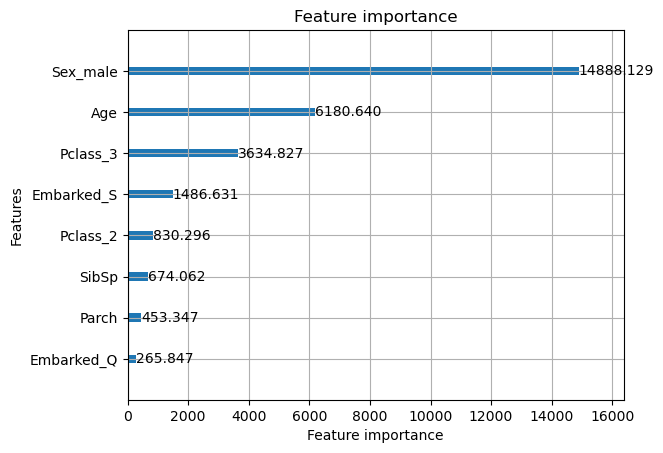

In [72]:
# Plot the importance of features based on the gain metric using the optimized LightGBM model
lgb.plot_importance(
    lgb_model_optimized,            # The trained LightGBM model
    max_num_features=10,            # Limit the number of features to display
    importance_type='gain'          # Metric for measuring feature importance (gain)
)

### Comparative Analysis:

#### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [73]:
# Calculate metrics for the LightGBM model
accuracy_lgbm = accuracy_score(y_train_balanced, lgbm_y_train_preds)  # Accuracy score for LightGBM
precision_lgbm = precision_score(y_train_balanced, lgbm_y_train_preds, average="micro")  # Precision score for LightGBM
recall_lgbm = recall_score(y_train_balanced, lgbm_y_train_preds, average="micro")  # Recall score for LightGBM
f1_lgbm = f1_score(y_train_balanced, lgbm_y_train_preds, average="micro")  # F1 Score for LightGBM
roc_auc_lgbm = roc_auc_score(y_train_balanced, lgbm_y_train_preds)  # ROC AUC score for LightGBM

# Calculate metrics for the XGBoost model
accuracy_xgb = accuracy_score(y_train_balanced, xgbm_model_train_y_preds_1)  # Accuracy score for XGBoost
precision_xgb = precision_score(y_train_balanced, xgbm_model_train_y_preds_1, average="micro")  # Precision score for XGBoost
recall_xgb = recall_score(y_train_balanced, xgbm_model_train_y_preds_1, average="micro")  # Recall score for XGBoost
f1_xgb = f1_score(y_train_balanced, xgbm_model_train_y_preds_1, average="micro")  # F1 Score for XGBoost
roc_auc_xgb = roc_auc_score(y_train_balanced, xgbm_model_train_y_preds_1)  # ROC AUC score for XGBoost

# Print training metrics for LightGBM
print("******* Training Metrics *******")
print("LightGBM Metrics:")
print(f"Accuracy  : {accuracy_lgbm}")  # Display accuracy for LightGBM
print(f"Precision : {precision_lgbm}")  # Display precision for LightGBM
print(f"Recall    : {recall_lgbm}")  # Display recall for LightGBM
print(f"F1 Score  : {f1_lgbm}")  # Display F1 Score for LightGBM
print(f"AUC-ROC   : {roc_auc_lgbm}")  # Display ROC AUC for LightGBM

# Print training metrics for XGBoost
print("******* Training Metrics *******")
print("\nXGBoost Metrics:")
print(f"Accuracy  : {accuracy_xgb}")  # Display accuracy for XGBoost
print(f"Precision : {precision_xgb}")  # Display precision for XGBoost
print(f"Recall    : {recall_xgb}")  # Display recall for XGBoost
print(f"F1 Score  : {f1_xgb}")  # Display F1 Score for XGBoost
print(f"AUC-ROC   : {roc_auc_xgb}")  # Display ROC AUC for XGBoost

******* Training Metrics *******
LightGBM Metrics:
Accuracy  : 0.9010416666666666
Precision : 0.9010416666666666
Recall    : 0.9010416666666666
F1 Score  : 0.9010416666666666
AUC-ROC   : 0.9010416666666667
******* Training Metrics *******

XGBoost Metrics:
Accuracy  : 0.8984375
Precision : 0.8984375
Recall    : 0.8984375
F1 Score  : 0.8984375
AUC-ROC   : 0.8984375


In [74]:
# Calculate metrics for the LightGBM model on the testing dataset
accuracy_lgbm = accuracy_score(y_test_balanced, lgbm_y_test_preds)  # Accuracy score for LightGBM
precision_lgbm = precision_score(y_test_balanced, lgbm_y_test_preds, average="micro")  # Precision score for LightGBM
recall_lgbm = recall_score(y_test_balanced, lgbm_y_test_preds, average="micro")  # Recall score for LightGBM
f1_lgbm = f1_score(y_test_balanced, lgbm_y_test_preds, average="micro")  # F1 Score for LightGBM
roc_auc_lgbm = roc_auc_score(y_test_balanced, lgbm_y_test_preds)  # ROC AUC score for LightGBM

# Calculate metrics for the XGBoost model on the testing dataset
accuracy_xgb = accuracy_score(y_test_balanced, xgbm_model_test_y_preds_1)  # Accuracy score for XGBoost
precision_xgb = precision_score(y_test_balanced, xgbm_model_test_y_preds_1, average="micro")  # Precision score for XGBoost
recall_xgb = recall_score(y_test_balanced, xgbm_model_test_y_preds_1, average="micro")  # Recall score for XGBoost
f1_xgb = f1_score(y_test_balanced, xgbm_model_test_y_preds_1, average="micro")  # F1 Score for XGBoost
roc_auc_xgb = roc_auc_score(y_test_balanced, xgbm_model_test_y_preds_1)  # ROC AUC score for XGBoost

# Print testing metrics for LightGBM
print("******* Testing Metrics *******")
print("LightGBM Metrics:")
print(f"Accuracy  : {accuracy_lgbm}")  # Display accuracy for LightGBM
print(f"Precision : {precision_lgbm}")  # Display precision for LightGBM
print(f"Recall    : {recall_lgbm}")  # Display recall for LightGBM
print(f"F1 Score  : {f1_lgbm}")  # Display F1 Score for LightGBM
print(f"AUC-ROC   : {roc_auc_lgbm}")  # Display ROC AUC for LightGBM

# Print testing metrics for XGBoost
print("******* Testing Metrics *******")
print("\nXGBoost Metrics:")
print(f"Accuracy  : {accuracy_xgb}")  # Display accuracy for XGBoost
print(f"Precision : {precision_xgb}")  # Display precision for XGBoost
print(f"Recall    : {recall_xgb}")  # Display recall for XGBoost
print(f"F1 Score  : {f1_xgb}")  # Display F1 Score for XGBoost
print(f"AUC-ROC   : {roc_auc_xgb}")  # Display ROC AUC for XGBoost

******* Testing Metrics *******
LightGBM Metrics:
Accuracy  : 0.7696969696969697
Precision : 0.7696969696969697
Recall    : 0.7696969696969697
F1 Score  : 0.7696969696969697
AUC-ROC   : 0.7696969696969698
******* Testing Metrics *******

XGBoost Metrics:
Accuracy  : 0.7666666666666667
Precision : 0.7666666666666667
Recall    : 0.7666666666666667
F1 Score  : 0.7666666666666667
AUC-ROC   : 0.7666666666666667


#### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

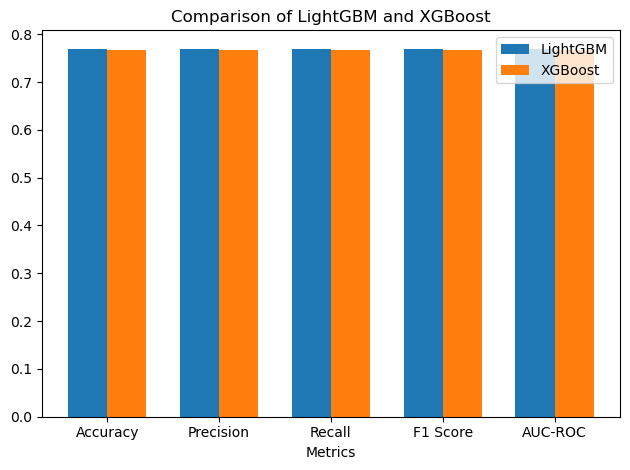

In [75]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # Importing numpy for numerical operations

# Define metrics and corresponding scores for LightGBM and XGBoost
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']  # List of metrics
lgbm_scores = [accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm, roc_auc_lgbm]  # LightGBM scores
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]  # XGBoost scores

x = np.arange(len(metrics))  # Define the positions of the metrics on the x-axis
width = 0.35  # Define the width of the bars in the bar plot

fig, ax = plt.subplots()  # Create a new figure and axes
# Plot bars for LightGBM scores
bars1 = ax.bar(x - width/2, lgbm_scores, width, label='LightGBM')
# Plot bars for XGBoost scores
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost')

# Set the x-axis labels, title, and legend
ax.set_xlabel('Metrics')  # Label for the x-axis
ax.set_title('Comparison of LightGBM and XGBoost')  # Title of the plot
ax.set_xticks(x)  # Set the positions of the x-ticks
ax.set_xticklabels(metrics)  # Set the labels for the x-ticks
ax.legend()  # Display the legend

fig.tight_layout()  # Adjust the layout to make room for the labels

plt.show()  # Display the plot

In [ ]:
Both LightGBM and XGBoost are like smart tools that can help us make predictions. We tested them on a dataset and found that they both did a pretty good job.

LightGBM was slightly better at telling the difference between things that are similar and different, while XGBoost was also good at this but maybe not quite as good.

So, if you need a tool to make predictions and you care a lot about how well it can tell things apart, then LightGBM might be a good choice. But if you just need a good tool overall, either one would work fine.